# Classify BBB molecules using PubMed BERT 

- Load BBB dataset with pre-defined train-test split 
- Load pretrained model from HuggingFace
- Fine-tune pretrained model using BBB dataset
- Evaluate the models performance

In [ ]:
!pip install transformers
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 115.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Mount google drive to access files

In [ ]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
from simpletransformers.classification import ClassificationModel
from transformers import AutoTokenizer
import pandas as pd
import numpy as np
import sklearn

In [ ]:
# load PubMed BERT tokenizer from HuggingFace

In [ ]:
train_df = pd.read_csv("https://staicentreprod001.blob.core.windows.net/share/mlprague23/B3DB_cleaned_name_TRAIN.csv")
train_df = train_df.drop(columns=["split"]) # if you use your preprocessed data you don't need this line
train_df.head()

,name,label
0,crotetamide,1
1,imiclopazine,1
2,isopentylacetate,1
3,brotizolam,1
4,dimeprozan,1


In [ ]:
test_df = pd.read_csv("https://staicentreprod001.blob.core.windows.net/share/mlprague23/B3DB_cleaned_name_TEST.csv")
test_df = test_df.drop(columns=["split"]) # if you use your preprocessed data you don't need this line
test_df.head()

,name,label
0,dronedarone,0
1,calciumfolinate,1
2,chembl195725,1
3,lometraline,1
4,schembl7481790,1


- Simple Transfomers package makes it easy to fine-tune transformer models for any task
- See here for help on defining a classification model: https://simpletransformers.ai/docs/classification-models/
- If the tokenizer is not specified, the model_type will be used to determine the type of the tokenizer
- You can pass a wide range of arguments for the model training, see here for inspiration: https://simpletransformers.ai/docs/usage/#configuring-a-simple-transformers-model
- These arguments can help boost your model performance so feel free to play around with them :)


Some weights of the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Ber

In [ ]:
# Create directory to store model weights (change path accordingly to where you want)
!mkdir -p PubMed_BERT_test_run

- Train the model that you defined: https://simpletransformers.ai/docs/classification-models/#training-a-classification-model


In [ ]:
# Train the model

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3364 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/106 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/106 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/106 [00:00<?, ?it/s]

(318, 0.5221300290065741)

In [ ]:
# accuracy
result, model_outputs, wrong_predictions = model.eval_model(test_df, acc=sklearn.metrics.f1_score)
pred_test = np.argmax(model_outputs, axis=-1)

# print results
print(result)
print(model_outputs)
print(wrong_predictions)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/842 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/106 [00:00<?, ?it/s]

{'mcc': 0.459681997854966, 'tp': 469, 'tn': 173, 'fp': 113, 'fn': 87, 'auroc': 0.7963506816924083, 'auprc': 0.8675238946822131, 'acc': 0.8242530755711774, 'eval_loss': 0.5422067462273363}
[[ 1.50683594 -0.79003906]
 [ 0.32763672  0.2130127 ]
 [-0.16149902  0.4140625 ]
 ...
 [-0.1394043   0.40844727]
 [-1.54589844  1.58886719]
 [-1.125       1.33007812]]
[{'guid': 1, 'text_a': 'calciumfolinate', 'text_b': None, 'label': 1}, {'guid': 6, 'text_a': 'bdbm86425', 'text_b': None, 'label': 0}, {'guid': 7, 'text_a': 'zinc11616623', 'text_b': None, 'label': 0}, {'guid': 8, 'text_a': 'threomefloquine', 'text_b': None, 'label': 1}, {'guid': 9, 'text_a': 'cesamet', 'text_b': None, 'label': 1}, {'guid': 16, 'text_a': 'zinc27644005', 'text_b': None, 'label': 0}, {'guid': 18, 'text_a': 'streptozotocin', 'text_b': None, 'label': 0}, {'guid': 20, 'text_a': 'tretinoin', 'text_b': None, 'label': 1}, {'guid': 23, 'text_a': 'clemastine', 'text_b': None, 'label': 1}, {'guid': 32, 'text_a': 'algestone', 'text

In [ ]:
predictions, raw_outputs = model.predict(['threomefloquine'])
print(predictions)
print(raw_outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[0]
[[ 0.41210938 -0.50830078]]


In [ ]:
predictions, raw_outputs = model.predict(['crotetamide'])
print(predictions)
print(raw_outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1]
[[-1.06640625  1.31054688]]


In [ ]:
print("Test accuracy: {:.2f}".format(sklearn.metrics.accuracy_score(test_df.label, pred_test)))

# print classification report

Test accuracy: 0.76
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       286
           1       0.81      0.84      0.82       556

    accuracy                           0.76       842
   macro avg       0.74      0.72      0.73       842
weighted avg       0.76      0.76      0.76       842



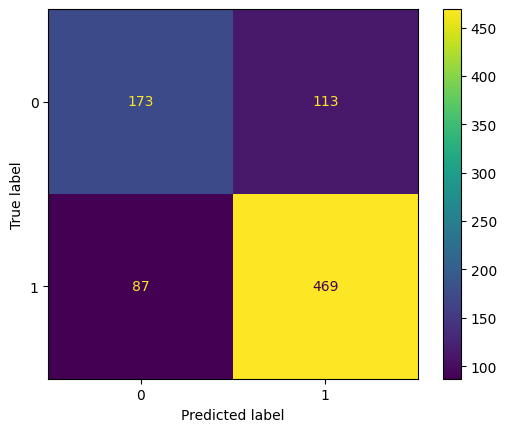

In [ ]:
# print confusion matrix